In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_white
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import numpy as np

In [2]:
data = pd.read_csv('Study2bLinearRegressionData.csv')

In [3]:
data = data.dropna()
data.describe()

,Gender,Group,STAI_CHANGE,Age,vWTP,WTPsignesMarketChange,WTPabsMarketChange
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,1.416667,0.500000,3.500000,22.708333,3.272232,1.152707,1.062964
std,0.498224,0.505291,4.476891,4.222323,9.495732,3.105085,3.642526
min,1.000000,0.000000,-3.000000,19.000000,-48.201117,-1.456725,-15.325246
25%,1.000000,0.000000,0.000000,20.000000,0.052937,-0.244293,-0.003275
50%,1.000000,0.500000,3.000000,20.500000,1.800000,0.003407,0.148469
75%,2.000000,1.000000,6.250000,23.500000,6.732407,0.601672,1.764203
max,2.000000,1.000000,15.000000,34.000000,22.092308,12.732636,10.808173


In [4]:
for key in data.keys():
    print(key,"length of unique values:",len(set(data[key].tolist())))

Subject length of unique values: 48
Gender length of unique values: 2
Group length of unique values: 2
STAI_CHANGE length of unique values: 15
Age length of unique values: 13
vWTP length of unique values: 48
WTPsignesMarketChange length of unique values: 48
WTPabsMarketChange length of unique values: 48


/tmp/ipykernel_39339/3515656466.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(data.corr(),cmap="YlGnBu")


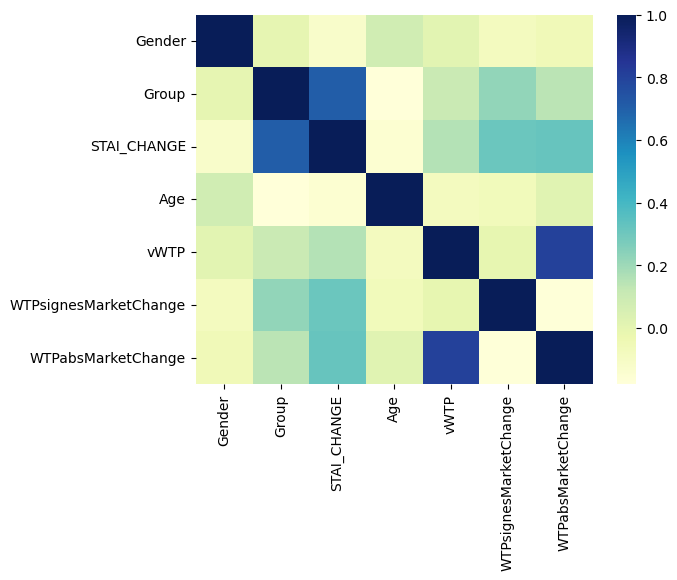

In [5]:
dataplot = sns.heatmap(data.corr(),cmap="YlGnBu")
plt.show()

In [6]:
X=data
Y=data["WTPabsMarketChange"]
X = X.drop(['WTPabsMarketChange',"WTPsignesMarketChange","vWTP","Subject"], axis=1)

In [7]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
3,8.264248,Age
0,8.126544,Gender
1,4.019280,Group
2,3.292777,STAI_CHANGE


In [8]:
for f in X.columns:
    X[f] = (X[f] - X[f].mean()) / X[f].std()

In [9]:
df=data
data=(df-df.mean())/df.std()

/tmp/ipykernel_39339/1038815728.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=(df-df.mean())/df.std()
/tmp/ipykernel_39339/1038815728.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=(df-df.mean())/df.std()


WTPabsmarketchange = β0 + β1* Trait Anxiety score + β2*Age + β3*Gender 

In [10]:
formula = 'vWTP ~ Gender + Age + STAI_CHANGE + Age * STAI_CHANGE'
model = smf.glm(formula = formula, data=data, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   vWTP   No. Observations:                   48
Model:                            GLM   Df Residuals:                       43
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 06 May 2023   Deviance:                       2295.7
Time:                        18:57:07   Pearson chi2:                 2.09e+17
No. Iterations:                    18   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -4.611e+15   9.84e+06  -4.

/home/debashish/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/debashish/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/home/debashish/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
